# Loan From From Prosper
## by Oliyide Ibrahim Owolabi


## Investigation Overview

> I will be exploring the dataset and visualizing some of the insigh like the relationship between the Loan Original Amount, Prosper Principal Borrowed, Prosper Rating, the relationship between prosper score and lender yield where stated monthly income is not zero(0) and is more than $10.
 

## Dataset Overview

> The dataset is about loan giving to customers of the Prosper organization, the dataset contain 81 distinct variables(columns) and 113937 rows of data or information pertaining to a particular loan giving to a new or old borrower of the orgainzation, the dataset contain details like the total amount borrowed, the  length of the loan, the status of the loan like cancelled, charged off, completed, past due etc.

In [75]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
from scipy import stats

%matplotlib inline

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [2]:
df = pd.read_csv('prosperLoanData.csv')


### Visualization 1
#### Let's look at the relationship between the Loan Original Amount,  Prosper Principal Borrowed, Prosper Rating (Numeric).

Correlation coefficient
(0.3822678384140585, 0.0)


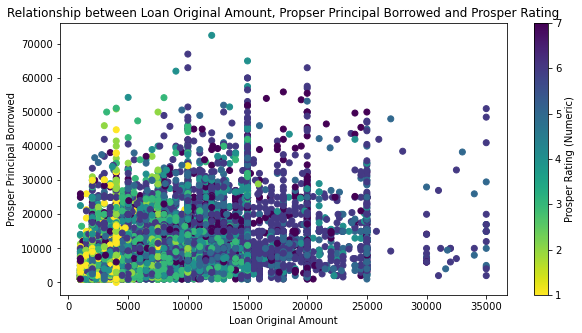

In [100]:
## Find the correlation coefficient of the plot
df_7 = df[(df.LoanOriginalAmount.notnull()) & (df.ProsperPrincipalBorrowed.notnull())]
print('Correlation coefficient');
print(stats.pearsonr(df_7.LoanOriginalAmount , df_7.ProsperPrincipalBorrowed ));

## Creating a scatterplot for the variables
df_4 = df[df['ProsperRating (Alpha)'].notnull()]
plt.figure(figsize=[10,5])
plt.scatter(data=df_4, x='LoanOriginalAmount', y='ProsperPrincipalBorrowed', c='ProsperRating (numeric)',cmap='viridis_r' )
plt.colorbar(label='Prosper Rating (Numeric)')
plt.title('Relationship between Loan Original Amount, Propser Principal Borrowed and Prosper Rating')
plt.xlabel('Loan Original Amount')
plt.ylabel('Prosper Principal Borrowed');

#### Observation
>  Looking at graph, low prosper principal borrowed and loan original amount caused a low prosper rating, one can say that the graph is postively correlated, an increase in both prosper principal borrowed and loan original amount causes an increase in propser rating

### Visualization 2
#### Find the relationship between prosper score and lender yield where stated monthly income is not zero(0) and is more than $10

The mean, median and quartiles
       ProsperScore    LenderYield
count  84853.000000  113937.000000
mean       5.950067       0.182701
std        2.376501       0.074516
min        1.000000      -0.010000
25%        4.000000       0.124200
50%        6.000000       0.173000
75%        8.000000       0.240000
max       11.000000       0.492500
Correlation coefficient
(-0.6497834730131653, 0.0)


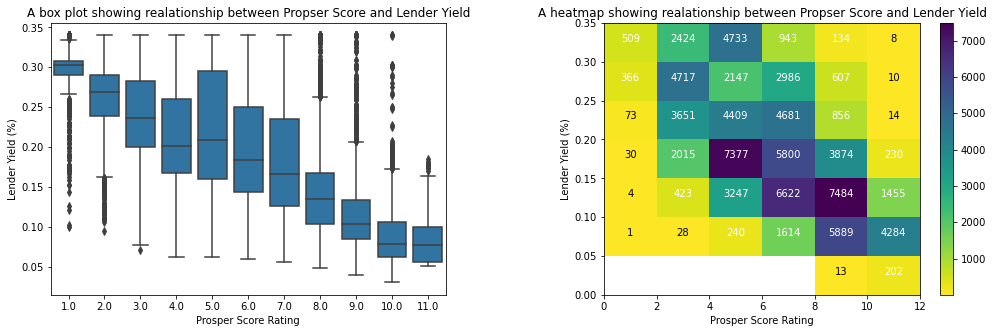

In [103]:
### condition to extract the data needed for visualization
df_3 = df[(df.StatedMonthlyIncome != 0) & (df.StatedMonthlyIncome > 10)]
df_3 = df_3[df_3.ProsperScore.notnull()]
base_color = sb.color_palette()[0]

## Creating the plot
plt.figure(figsize=[17,5])
bins_y = np.arange(0, 0.34+0.05, 0.05)
bins_x = np.arange(0,11+2, 2)

## Print out the mean, quartile(s) of Prosper Score and Lender Yield using .describe()
dat=  {
    'ProsperScore': df.ProsperScore,
    'LenderYield': df.LenderYield
}
num2 = pd.DataFrame(data = dat)
print('The mean, median and quartiles')
print(num2.describe());

## Find the correlation coefficient of the plot
df_8 = df[(df.ProsperScore.notnull()) & (df.LenderYield.notnull())]
print('Correlation coefficient');
print(stats.pearsonr(df_8.ProsperScore , df_8.LenderYield ));

plt.subplot(1,2,1)
sb.boxplot(data=df_3, x='ProsperScore', y='LenderYield', color=base_color)
plt.ylabel('Lender Yield (%)')
plt.xlabel('Prosper Score Rating')
plt.title('A box plot showing realationship between Propser Score and Lender Yield')

plt.subplots_adjust(wspace=0.4)

plt.subplot(1,2,2)
h2d = plt.hist2d(data=df_3, x='ProsperScore', y='LenderYield', cmin=0.5, cmap='viridis_r', bins=[bins_x, bins_y])
plt.colorbar()
plt.title('A heatmap showing realationship between Propser Score and Lender Yield')
plt.ylabel('Lender Yield (%)')
plt.xlabel('Prosper Score Rating');
counts=h2d[0]
for i in range(counts.shape[0]):
    for j in range(counts.shape[1]):
        c = counts[i,j]
        if c >= 100:
            plt.text(bins_x[i]+1, bins_y[j]+0.03,int(c),ha='center',va='center',color='white')
        elif c > 0:
            plt.text(bins_x[i]+1, bins_y[j]+0.03,int(c),ha='center',va='center',color='black');

#### Observation
> Using both the data on the box plot and the heat map, one can see that the distribution is negatively correlated, meaning customers with high prosper rating tends to have low interest rate on loan taking from the organization while customers with low rating tends to have high interest rating on loan taking from the organization.
  

### Visualization 3
#### Find the relationship between interest rate of people whose, monthly due for the all month in the dataset is not zero

The mean, median and quartiles
         LenderYield
count  113937.000000
mean        0.182701
std         0.074516
min        -0.010000
25%         0.124200
50%         0.173000
75%         0.240000
max         0.492500


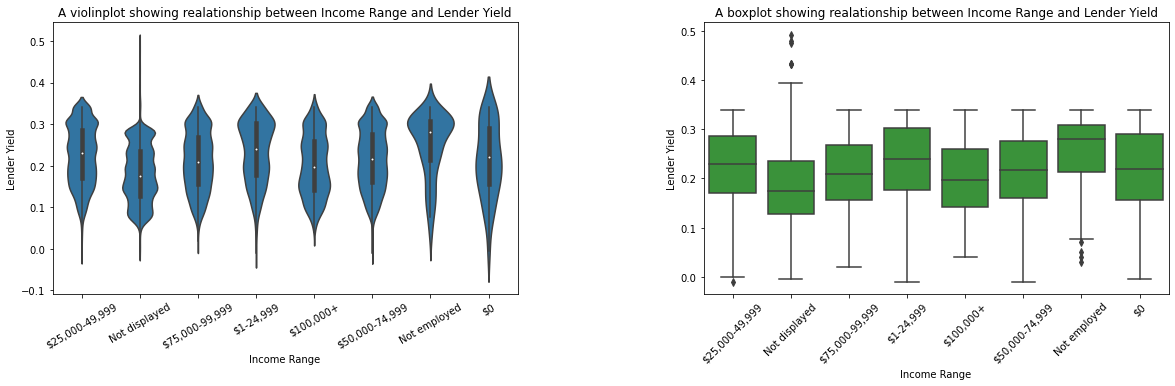

In [101]:
## Amount Delinquent means the monthly due of a borrower
df_2 = df[df.AmountDelinquent != 0 ]

## Converting Income range the data type to catedory data type
income_range = ['$25,000-49,999', 'Not displayed', '$75,000-99,999', '$1-24,999',
       '$100,000+', '$50,000-74,999', 'Not employed', '$0']
income_classes = pd.api.types.CategoricalDtype(ordered= True, categories= income_range)

df_2['IncomeRange'] = df_2['IncomeRange'].astype(income_classes);

## Print out the mean, quartile(s) of Lender Yield using .describe()
da =  {
    'IncomeRange': df.IncomeRange,
    'LenderYield': df.LenderYield
}
num = pd.DataFrame(data = da)
print('The mean, median and quartiles')
print(num.describe());

## Creating the plot for the visualization 
plt.figure(figsize=[20,5])
base_color = sb.color_palette()[0]
base_color2 = sb.color_palette()[2]

plt.subplot(1,2,1)
sb.violinplot(data=df_2, x='IncomeRange', y='LenderYield', color=base_color)
plt.ylabel('Lender Yield')
plt.xlabel('Income Range')
plt.xticks(rotation=30)
plt.subplots_adjust(wspace=0.4)
plt.title('A violinplot showing realationship between Income Range and Lender Yield')

plt.subplot(1,2,2)




sb.boxplot(data=df_2, x='IncomeRange', y='LenderYield', color=base_color2)
plt.ylabel('Lender Yield')
plt.xlabel('Income Range')
plt.title('A boxplot showing realationship between Income Range and Lender Yield')
plt.xticks(rotation=45);

#### Observation
> I used both the violin plot and box plot to depict the data for this insight, from the violin plot, one can see that customers that have zero(0) income range and not employed are giving high interest rate, from the box plot the first and third quartile for customers not employed have the highest value also the median.

### Conclusions
> From the explanatory analysis, one can see that low principal amount and low loan amount will caused a customers to have a low prosper rating which will likely affect the ease of the customers when taking loan from the orgainzation, therefore customers whose rating is high are likely to take huge amount of loan from the organization. Money should be well reserved, and customers like that should be sort after.
 
> Secondly having high interest rate that is lender yield means the customers take low amount of loan and that will cause a low rating from the organization, the high interest rate can be attributed to customers that have zero (0) income or are not employed, meaning customers from the organization that have very high income tends to take huge amount of loan causing a low interest rate and high rating from the organization.

In [106]:
!jupyter nbconvert visualization_presentation.ipynb --to slides --post serve --no-input --no-prompt

[NbConvertApp] Converting notebook visualization_presentation.ipynb to slides
[NbConvertApp] Writing 872875 bytes to visualization_presentation.slides.html
[NbConvertApp] Redirecting reveal.js requests to https://cdnjs.cloudflare.com/ajax/libs/reveal.js/3.5.0
Traceback (most recent call last):
  File "C:\Users\HP\anaconda3\Scripts\jupyter-nbconvert-script.py", line 10, in <module>
    sys.exit(main())
  File "C:\Users\HP\anaconda3\lib\site-packages\jupyter_core\application.py", line 264, in launch_instance
    return super(JupyterApp, cls).launch_instance(argv=argv, **kwargs)
  File "C:\Users\HP\anaconda3\lib\site-packages\traitlets\config\application.py", line 846, in launch_instance
    app.start()
  File "C:\Users\HP\anaconda3\lib\site-packages\nbconvert\nbconvertapp.py", line 369, in start
    self.convert_notebooks()
  File "C:\Users\HP\anaconda3\lib\site-packages\nbconvert\nbconvertapp.py", line 541, in convert_notebooks
    self.convert_single_notebook(notebook_filename)
  File 